En este notebook usamos SymPy para realizar manipulación algebraica. En particular, realizamos expansiones de sumas infintas, expansiones de Taylor, reemplazamos expresiones, y obtenemos algunos de los resultados usados en la teoría de gases de Fermiones. Comenzamos con código para que Sympy funcione automáticamente en Google colab, o en notebooks Jupyter si alguno de ustedes tiene Python y Jupyter instalado y decide ejecutarlo en sus computadoras. Recuerden ejecutar cada celda aprentando SHIFT+ENTER:

In [ ]:
# Codigo para que Sympy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

En Sympy debemos definir los simbolos que vamos a usar, y decir si son reales o complejos:

In [3]:
x             = symbols("x",real=True)
z,l,lamda,g,v = symbols("z l lamda g v",real=True)

Definimos las funciones de Fermi f_3/2(z) y f_5/2(z). Las expandimos en sus primeros dos términos, e imprimimos la expansión de f_3/2(z) para verificar que todo esté bien. Notar que no nos quedamos solo con el término lineal, y para verificar los resultados preservamos también el término cuadrático. El comando "doit" expande la suma:

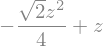

In [4]:
f32 = Sum((-1)**(l+1)*z**l/l**Rational('3/2'), (l,1,2)).doit()
f52 = Sum((-1)**(l+1)*z**l/l**Rational('5/2'), (l,1,2)).doit()
f32

Ahora invertimos x=f_3/2(z) para hallar z en función de x, donde x = lambda^3/(gv). La función "solve" busca las raices de la ecuación que le pasamos igualada a cero, para la incógnita que listamos luego de definir la ecuación:

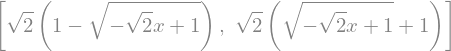

In [5]:
solution = solve(x - f32, z)
solution

De las dos soluciones nos quedamos con la primera (solution[0]), que es la relevante físicamente (la otra no es pequeña para x = lambda^3/(gv) pequeño). La expandimos por Taylor hasta tercer orden. Para eso usamos la función "series", y le decimos que expanda a la solución en función de x alrededor del 0 hasta términos de orden 4. Esa es nuestra aproximación para z(x), o para z(lambda^3/gv):

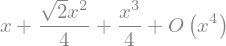

In [6]:
series(solution[0], x,0,4)

Veamos que esto es compatible con la expresión que vimos en clase. Substituimos x=lambda^3/(gv) en este resultado usando la función "subs":

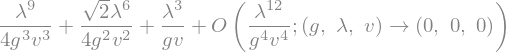

In [7]:
series(solution[0], x,0,4).subs(x, lamda**3/(g*v))

Tomemos la aproximación de z solo preservando los términos en esta expansión hasta segundo orden en x o en lambda^3/(gv):

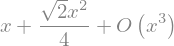

In [8]:
z_aprox = series(solution[0], x,0,3)
z_aprox

Reemplacemos ahora este resultado en P/(kT) = (g/lambda^3) f_5/2(z). Hacemos todo en un paso: reemplazamos el valor de z por el de z_aprox en f52, multiplicamos f52 por (g/lambda^3), y expandimos el resultado. La función "removeO" al final remueve todos los términos que venimos arrastrando con el orden de las correcciones al siguiente orden:

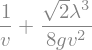

In [26]:
expand((g/lamda**3)*f52.subs(z, z_aprox).subs(x, lamda**3/(g*v))).removeO()

¡Esta es la expresión correcta para la expansión del virial de P/(kT) para un gas de Fermi a altas temperaturas hasta orden lambda^3/(gv)! De paso, en esta breve lección sobre como usar Sympy para hacer manipulación algebraica, les dejo tres ejemplos sencillos sobre cómo calcular integrales indefinidas, derivadas, y sobre como simplificar expresiones:

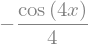

In [28]:
integrate(sin(4*x), x)

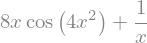

In [32]:
diff(sin(4*x**2) + ln(x), x)

In [33]:
simplify(sin(x)**2 + cos(x)**2)